In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import urllib

from rayopt import *

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named rayopt

/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/elements.py:134: RuntimeWarning: invalid value encountered in multiply
  self._offset = d*u


material not found LASF14A __init__() got an unexpected keyword argument 'nd'
material not found SK16 __init__() got an unexpected keyword argument 'nd'
material not found BAF51 __init__() got an unexpected keyword argument 'nd'
material not found SF57 __init__() got an unexpected keyword argument 'nd'
material not found SF58 __init__() got an unexpected keyword argument 'nd'
material not found N-SK15 __init__() got an unexpected keyword argument 'nd'
material not found N-FK51A __init__() got an unexpected keyword argument 'nd'
material not found N-FK51 __init__() got an unexpected keyword argument 'nd'
material not found N-BK7 __init__() got an unexpected keyword argument 'nd'
material not found N-BK7 __init__() got an unexpected keyword argument 'nd'
FCUR not handled 0 2 0 0 0 0 3.0 1.0E+5 0 0
AXCL not handled 1 3 0 0 0 0 0 1.0E+2 0 0
ASTI not handled 0 2 5.0E-1 5.0E-1 0 0 0 1.0E+1 0 0
LONA not handled 0 0 0 0 0 0 2.0E-2 1.0E+3 0 0
TTHI not handled 2 16 0 0 0 0 2.01E+1 0 0 0
OPGT not

/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/geometric_trace.py:100: RuntimeWarning: invalid value encountered in double_scalars
  t = -np.dot(wy, u)/np.dot(wu, u)
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  self.u[0, 0]*self.u[-2, 1])
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:161: RuntimeWarning: invalid value encountered in subtract
  return self.focal_distance - self.focal_length
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:167: RuntimeWarning: invalid value encountered in add
  return self.focal_length[::-1] + self.focal_distance
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:186: RuntimeWarning: divide by zero encountered in true_divide
  return self.n[(0, -2), ]/(2*na)
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:191: Runt

ValueError: ('no viable interval found', 0.0, 9.313225746154785e-10, nan)

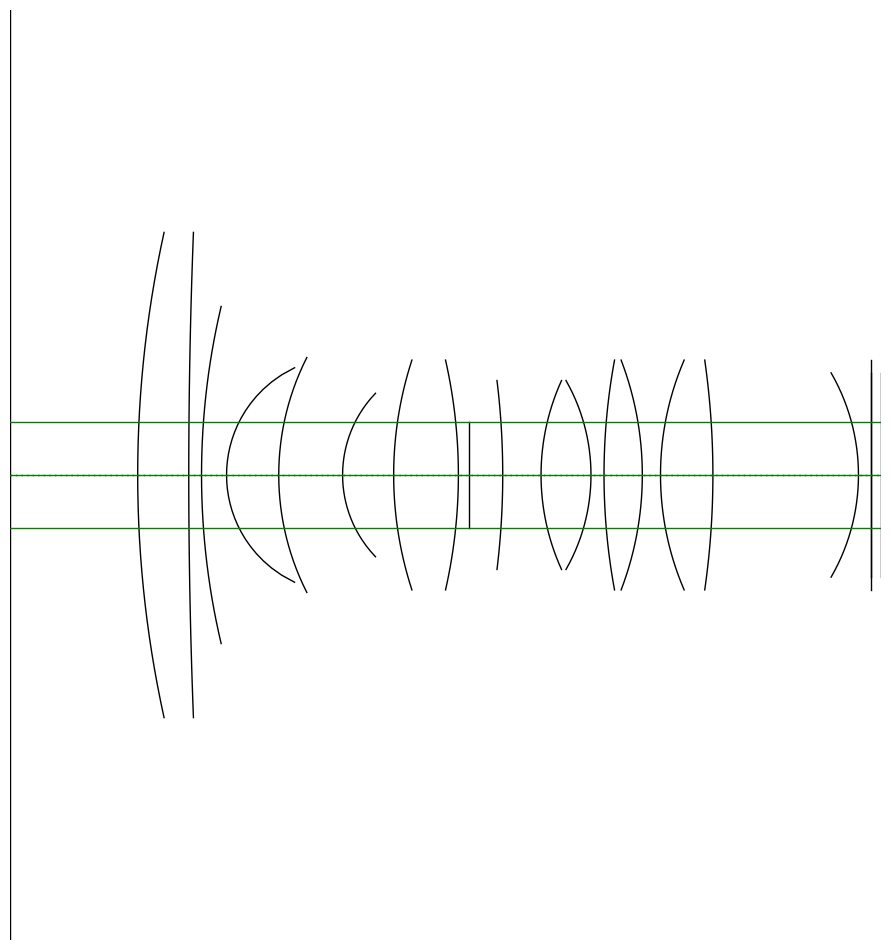

In [2]:
f = "https://raw.githubusercontent.com/Elphel/elens/master/ofh_v2_utf16le.zmx"
s = zmx_to_system(urllib.request.urlopen(f).read().decode("utf16"))

s.object.angle = np.deg2rad(38)
s.fields = 0, .7, 1.
del s[:2]
s[0].distance = 0
s[1].distance = 5
s.description = "Elphel 1/2.5\", f=4.5mm, f/1.8"
s.stop = 9
s.object.pupil.radius = 4.5/1.8/2
# s[-1].direction = 0, 0, 1.
s.update()

a = Analysis(s)

In [3]:
import io
f = "https://raw.githubusercontent.com/Elphel/elens/master/elphel_F2.0_4.5.len"
s = len_to_system(io.StringIO(urllib.request.urlopen(f).read().decode("utf8")))
s.object.angle = np.deg2rad(38)
s.object.pupil.radius = 4.5/2/2
s.fields = 0, .7, 1.
s[0].radius = 10.
s[0].material = air
s[1].distance = 3.
del s[-2:]
s.stop = 9
s[s.stop].radius = 2.5
s[-3].distance = 0
s[-1].radius = 4
s[-5].distance += .3
s.update()
print(s)
s.plot(plt.gca())
Analysis(s)

FNO not handled ['2.0']
ANG not handled ['38.0']


/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/elements.py:134: RuntimeWarning: invalid value encountered in multiply
  self._offset = d*u


KeyError: 'material None/None/lasf14a not found'

In [4]:
print(system_to_yaml(s))

description: ''
elements:
- {material: basic/air, radius: 10.0}
- {curvature: 0.022314307720588213, distance: 3.0, material: Obsolete/LASF14A, radius: 9.5}
- {curvature: 0.0029395763498377657, distance: 2.8342502197064, material: basic/air,
  radius: 9.5}
- {curvature: 0.03197146653395714, distance: 0.479338086425, material: SCHOTT/SK16,
  radius: 6.6}
- {curvature: 0.21995534850141707, distance: 1.514547251578, material: basic/air,
  radius: 4.2}
- {curvature: 0.10089139243052675, distance: 1.9234731507825, material: SCHOTT/BAF51,
  radius: 4.6}
- {curvature: 0.2259168910143031, distance: 2.9182781603707, material: basic/air,
  radius: 3.2}
- {curvature: 0.06738849776197436, distance: 1.9933962755638, material: SCHOTT/SF57,
  radius: 4.5}
- {curvature: -0.05253049347569311, distance: 2.5291694371013, material: basic/air,
  radius: 4.5}
- {distance: 0.8092865346866, material: basic/air, radius: 2.5}
- {curvature: -0.034370633934576546, distance: 0.9039832952238, material: SCHOTT/SF58,
